In [6]:
import os
import pickle
import numpy as np
import pandas as pd

In [7]:
!pip install -q gdown
!gdown --id 1xLubDNoqBp_aMT8wxFQGw-dzjj1U5JJt

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1xLubDNoqBp_aMT8wxFQGw-dzjj1U5JJt
From (redirected): https://drive.google.com/uc?id=1xLubDNoqBp_aMT8wxFQGw-dzjj1U5JJt&confirm=t&uuid=0b389074-1b68-4a87-92d2-3adccdee6a45
To: /kaggle/working/merged_data.csv
100%|██████████████████████████████████████| 9.33G/9.33G [01:42<00:00, 91.4MB/s]


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dropout, Dense, Flatten
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import TimeSeriesSplit

In [9]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


merged_data = pd.read_csv(r"./merged_data.csv")


X = merged_data.iloc[:, :-1].values
y = merged_data.iloc[:, -1].values


X = X.reshape(X.shape[0], X.shape[1], 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()


model.add(Conv1D(filters=128, kernel_size=3, activation='relu' , input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=1))


model.add(Bidirectional(LSTM(256, return_sequences=False)))
model.add(Dropout(0.4))


model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))  
model.add(Dense(8, activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=1024, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
47506/47506 [==============================] - 734s 15ms/step - loss: 0.2166 - accuracy: 0.9191 - val_loss: 0.2049 - val_accuracy: 0.9218
Epoch 2/50
47506/47506 [==============================] - 713s 15ms/step - loss: 0.1193 - accuracy: 0.9548 - val_loss: 0.0818 - val_accuracy: 0.9677
Epoch 3/50
47506/47506 [==============================] - 726s 15ms/step - loss: 0.1020 - accuracy: 0.9611 - val_loss: 0.0830 - val_accuracy: 0.9668
Epoch 4/50
47506/47506 [==============================] - 728s 15ms/step - loss: 0.0927 - accuracy: 0.9646 - val_loss: 0.0708 - val_accuracy: 0.9718
Epoch 5/50
47506/47506 [==============================] - 728s 15ms/step - loss: 0.0874 - accuracy: 0.9665 - val_loss: 0.1562 - val_accuracy: 0.9400
Epoch 6/50
47506/47506 [==============================] - 726s 15ms/step - loss: 0.0825 - accuracy: 0.9683 - val_loss: 0.0621 - val_accuracy: 0.9754
Epoch 7/50
47506/47506 [==============================] - 746s 16ms/step - loss: 0.0786 - accuracy: 0.9698

In [11]:
model.save("model_filename.keras")
print(f"Saved model")

Saved model


In [12]:
from sklearn.metrics import classification_report
predict_x=model.predict(X_test)
y_pred=np.argmax(predict_x,axis=1)
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
from sklearn.metrics import roc_curve, auc, roc_auc_score


380048/380048 [==============================] - 1106s 3ms/step
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98   5529338
         1.0       0.99      1.00      1.00   2467458
         2.0       0.97      0.99      0.98   1395025
         3.0       0.96      0.98      0.97    780859
         4.0       0.97      0.99      0.98   1652375
         5.0       0.91      0.92      0.92    110369
         6.0       0.91      0.96      0.94    110964
         7.0       0.90      0.93      0.91    115132

    accuracy                           0.98  12161520
   macro avg       0.95      0.97      0.96  12161520
weighted avg       0.98      0.98      0.98  12161520



Confusion Matrix for:



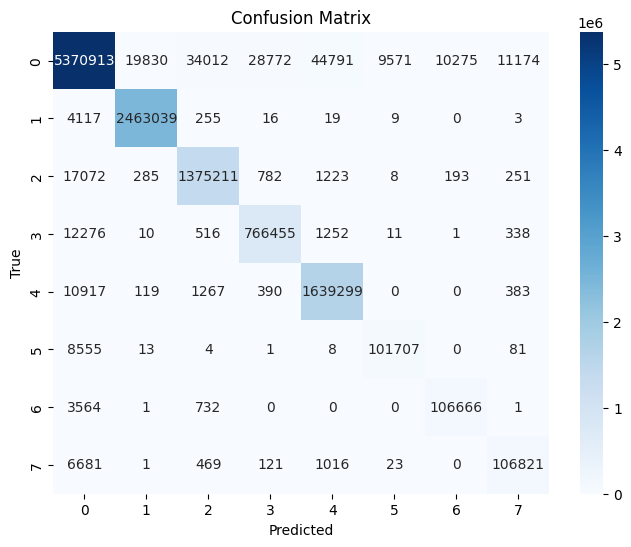

ROC for :



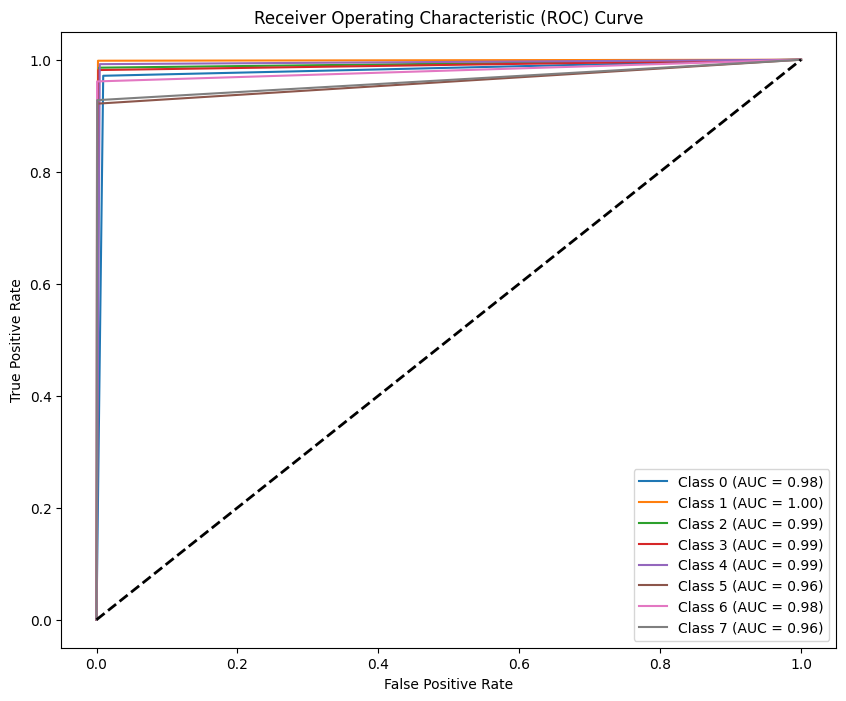

Training and Validation Curves


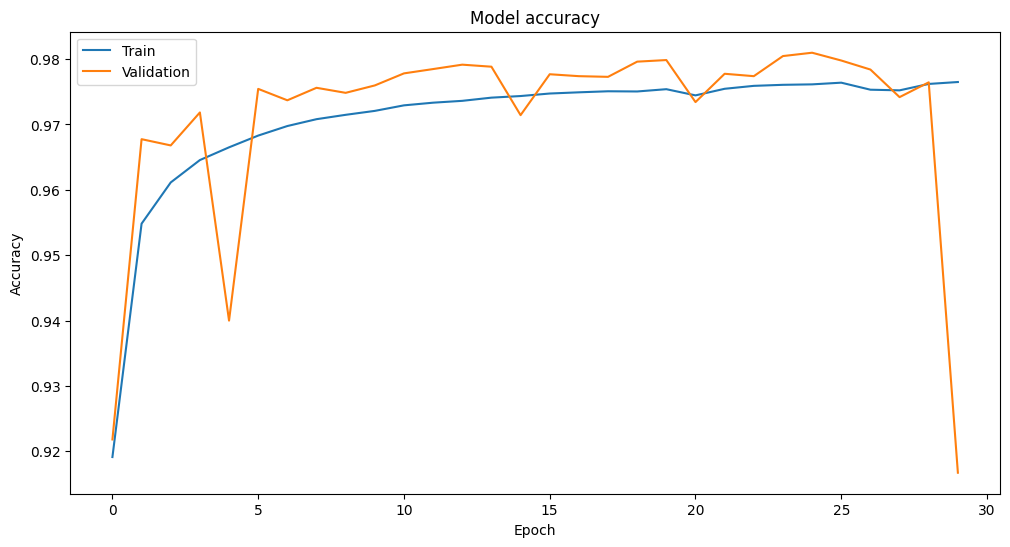

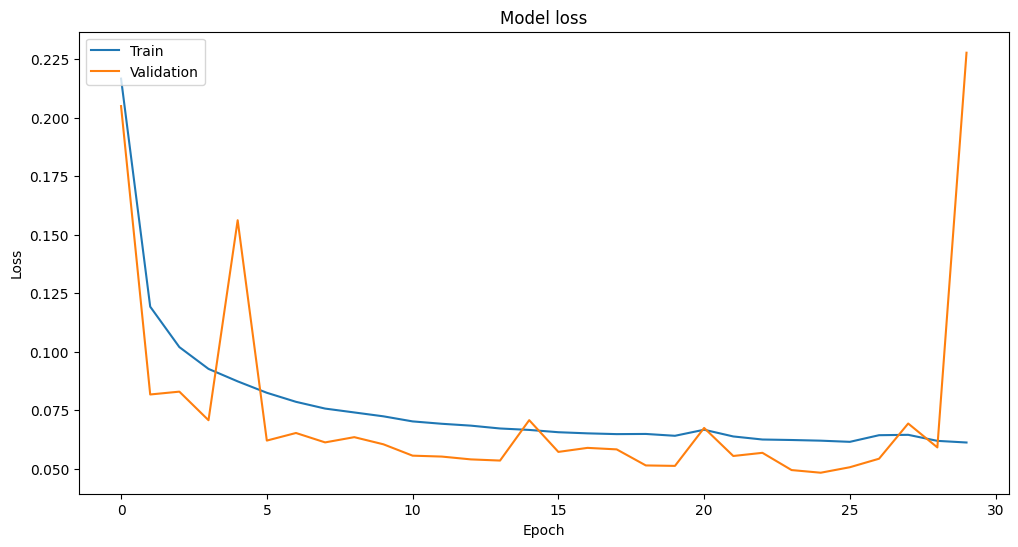

In [14]:

print(f"Confusion Matrix for:\n")
def plot_confusion_matrix(y_true, y_pred, classes):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.show()


y_pred_prob = predict_x
y_pred = np.argmax(y_pred_prob, axis=1)
plot_confusion_matrix(y_test, y_pred, classes=['0', '1', '2','3','4','5','6','7'])

print(f"ROC for :\n")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
n_classes = 8

y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_bin = label_binarize(y_pred, classes=np.arange(n_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))


for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Training and Validation Curves")

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9809720331011255
